<a href="https://colab.research.google.com/github/giovanimachado/phd-puc/blob/main/computacao-evolucionaria/Aula13_exercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

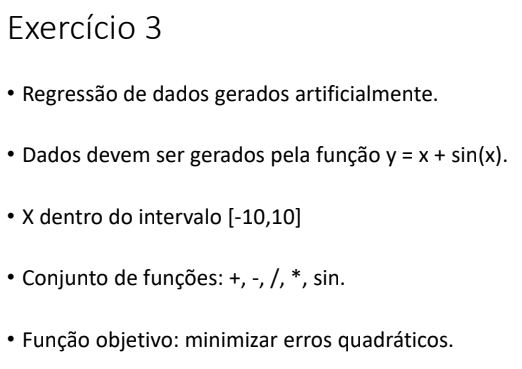

# Gerar dados artificialmente

In [3]:
import numpy as np

In [4]:
def funcao(x):
  y = x + np.sin(x)
  return y

In [6]:

x = np.arange(-10, 10, 0.1)
x = x.tolist()
x

[-10.0,
 -9.9,
 -9.8,
 -9.700000000000001,
 -9.600000000000001,
 -9.500000000000002,
 -9.400000000000002,
 -9.300000000000002,
 -9.200000000000003,
 -9.100000000000003,
 -9.000000000000004,
 -8.900000000000004,
 -8.800000000000004,
 -8.700000000000005,
 -8.600000000000005,
 -8.500000000000005,
 -8.400000000000006,
 -8.300000000000006,
 -8.200000000000006,
 -8.100000000000007,
 -8.000000000000007,
 -7.9000000000000075,
 -7.800000000000008,
 -7.700000000000008,
 -7.6000000000000085,
 -7.500000000000009,
 -7.400000000000009,
 -7.30000000000001,
 -7.20000000000001,
 -7.10000000000001,
 -7.000000000000011,
 -6.900000000000011,
 -6.800000000000011,
 -6.700000000000012,
 -6.600000000000012,
 -6.500000000000012,
 -6.400000000000013,
 -6.300000000000013,
 -6.2000000000000135,
 -6.100000000000014,
 -6.000000000000014,
 -5.900000000000015,
 -5.800000000000015,
 -5.700000000000015,
 -5.600000000000016,
 -5.500000000000016,
 -5.400000000000016,
 -5.300000000000017,
 -5.200000000000017,
 -5.10000000

In [8]:
y=[]
for i in x:
  y.append(funcao(i))
y

[-9.45597888911063,
 -9.44246410622468,
 -9.433520870748072,
 -9.428239373589056,
 -9.42567321877702,
 -9.42484887953819,
 -9.424775425453358,
 -9.424454423507063,
 -9.422889914100248,
 -9.419098362349352,
 -9.412118485241757,
 -9.401020856457885,
 -9.384917192891763,
 -9.362969230082184,
 -9.334397097874115,
 -9.298487112623492,
 -9.254598908088283,
 -9.202171833756298,
 -9.140730556679777,
 -9.06988981084509,
 -8.989358246623388,
 -8.898941341839778,
 -8.798543345374613,
 -8.68816823387701,
 -8.567919672031497,
 -8.437999976774751,
 -8.29870809581164,
 -8.150436620628579,
 -7.993667863849169,
 -7.828969040125894,
 -7.656986598718808,
 -7.47843976438822,
 -7.29411335113863,
 -7.104849920616621,
 -6.911541363513402,
 -6.7151199880878405,
 -6.516549204850519,
 -6.316813900484376,
 -6.11691059718253,
 -5.917837495727932,
 -5.720584501801102,
 -5.526123335169792,
 -5.335397820586271,
 -5.14931445740239,
 -4.968733362127707,
 -4.7944596744296355,
 -4.627235512444039,
 -4.467732557776125,
 

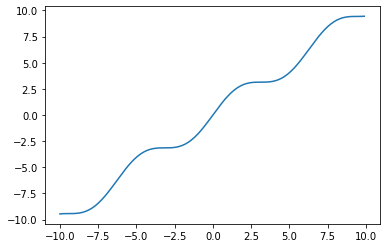

In [9]:
import matplotlib.pyplot as plt
plt.plot(x, y);

#GP

In [10]:
!pip install deap

     |████████████████████████████████| 163kB 5.1MB/s 


In [11]:
# Importar bibliotecas
import operator
import math
import random
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

In [12]:
# Definir funções

def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)   # nome do procedimento a ser gerado e o número de argumentos
pset.addPrimitive(operator.add, 2)  # funções e o número de argumentos
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(np.sin, 1) # adicionado o seno

In [13]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))                     # Minimização do erro
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)      # indivíduo

In [14]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)                  # metade genfull (toda folha tem a mesma profundidade entre min e max) metade genGrow (folhas podem ter profundidades diferente entre min e max).
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

In [15]:
# Função de avaliação
def evaluation(individual):
    # Transforma a expressão em árvore em uma função que pode ser chamada
    func = toolbox.compile(expr=individual)
    # Avalia o erro (MSE) entre a expressão gerada e o resultado real da função
    error = 0
    for idx, point in enumerate(x):
      error += (func(point) - y[idx])**2 
    return error,

In [16]:
# operadores
toolbox.register("evaluate", evaluation)                          # avaliação
toolbox.register("select", tools.selTournament, tournsize=3)      # seleção
toolbox.register("mate", gp.cxOnePoint)                           # crossover
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)          
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))     #limites para crossover
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))   # limites para mutação

In [17]:
random.seed(1)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)

pop, log = algorithms.eaSimple(pop, toolbox, 0.5, 0.1, 40,  halloffame=hof, verbose=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [18]:
# Função encontrada
for i in hof:
  print(i)

add(sin(ARG0), ARG0)


In [19]:
# compila função para testarmos
gp_func = toolbox.compile(expr=hof[0])

In [20]:
# calcula y pela função gerada pelo gp
y_hat=[]
for i in x:
  y_hat.append(gp_func(i))
y_hat

[-9.45597888911063,
 -9.44246410622468,
 -9.433520870748072,
 -9.428239373589056,
 -9.42567321877702,
 -9.42484887953819,
 -9.424775425453358,
 -9.424454423507063,
 -9.422889914100248,
 -9.419098362349352,
 -9.412118485241757,
 -9.401020856457885,
 -9.384917192891763,
 -9.362969230082184,
 -9.334397097874115,
 -9.298487112623492,
 -9.254598908088283,
 -9.202171833756298,
 -9.140730556679777,
 -9.06988981084509,
 -8.989358246623388,
 -8.898941341839778,
 -8.798543345374613,
 -8.68816823387701,
 -8.567919672031497,
 -8.437999976774751,
 -8.29870809581164,
 -8.150436620628579,
 -7.993667863849169,
 -7.828969040125894,
 -7.656986598718808,
 -7.47843976438822,
 -7.29411335113863,
 -7.104849920616621,
 -6.911541363513402,
 -6.7151199880878405,
 -6.516549204850519,
 -6.316813900484376,
 -6.11691059718253,
 -5.917837495727932,
 -5.720584501801102,
 -5.526123335169792,
 -5.335397820586271,
 -5.14931445740239,
 -4.968733362127707,
 -4.7944596744296355,
 -4.627235512444039,
 -4.467732557776125,
 

In [21]:
# calcula o erro quadrático
error = 0
for idx, point in enumerate(x):
  error += (gp_func(point) - y[idx])**2
error

0.0

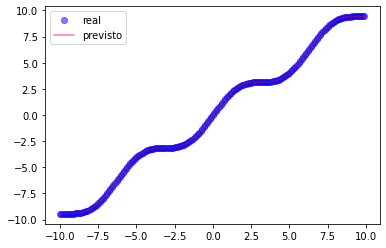

In [22]:
# plota a comparação
plt.plot(x, y, 'bo', label = 'real', color = 'blue', alpha =0.5);
plt.plot(x, y_hat, label = 'previsto', color= 'red', alpha = 0.5);
plt.legend();